## Introduction

## Preregistration of Hypotheses

Hypothesis 1: If a country’s borrower's obligation is greater, then they will be more likely to be a developed country. 

Analysis: We will conduct a logistic regression where we output whether or not a country is developed or developing (a dummy variable) based on an input of the borrower’s obligation (in USD dollars). The developed country dummy will be the reference variable, so we will test whether $e^\beta$, where $\beta$ is the coefficient output by the regression equation for the 'Borrower's Obligation' variable, is greater than 1.

Hypothesis 2: The higher a country’s GDP (in USD Dollars), the higher the intellectual property charges (in USD Dollars). 

Analysis: We will conduct a linear regression where we input the GDP of a country and output the intellectual property charges. We would test whether  (the regression coefficient of GDP in our equation) is greater than 0 (if an increase in GDP causes an increase in Intellectual Property Charges). 


## Data Analysis + Interpretations

In [40]:
import pandas as pd
import numpy as np
import math as math

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

### Hypothesis 1: Logistic Regression

In [19]:
#loading in cleaned csv from phase 2 (gdp data, debt data, and developed binary
#variable)

gdp_debt_csv = pd.read_csv("./GDP_Debt_Combined.csv")
print(gdp_debt_csv.head(2))

   Country  Original Principal Amount  Cancelled Amount  Undisbursed Amount  \
0  Albania               2.032160e+09      1.402591e+08         746585590.2   
1  Armenia               1.224900e+09      4.430277e+07         130159016.0   

   Disbursed Amount  Borrower's Obligation Country_Code     Indicator_Name  \
0      1.082344e+09            874013475.8          ALB  GDP (current US$)   
1      1.053062e+09            967175073.4          ARM  GDP (current US$)   

   Indicator_Code          2000  ...          2014          2015  \
0  NY.GDP.MKTP.CD  3.480355e+09  ...  1.322815e+10  1.138685e+10   
1  NY.GDP.MKTP.CD  1.911564e+09  ...  1.160951e+10  1.055334e+10   

           2016          2017          2018          2019          2020  \
0  1.186120e+10  1.301973e+10  1.515642e+10  1.540183e+10  1.516273e+10   
1  1.054614e+10  1.152746e+10  1.245794e+10  1.361929e+10  1.264170e+10   

           2021          2022  developed  
0  1.793057e+10  1.888210e+10        0.0  
1  1.38614

No handles with labels found to put in legend.


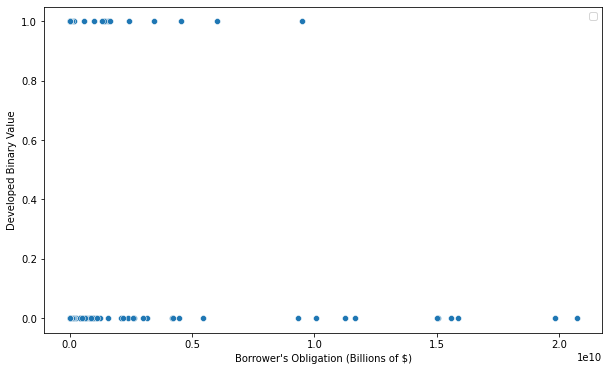

In [43]:
#plotting the data prior to the regression analysis, to get a visual
#understanding of borrower's obligation  in relation to developed/developing

plt.figure(figsize = (10, 6))
sns.scatterplot(y = gdp_debt_csv['developed'], x = gdp_debt_csv['Borrower\'s Obligation'])
plt.ylabel('Developed Binary Value')
plt.xlabel('Borrower\'s Obligation (Billions of $)')
plt.legend()

In [41]:
#fitting model and looking at coefficient
b_obl_model = LogisticRegression().fit(gdp_debt_csv[['Borrower\'s Obligation']], gdp_debt_csv['developed'])
b_obl_coeff = b_obl_model.coef_
print(f"The model's coefficient is {b_obl_coeff}")
print(f"The value for e^(beta) is {math.exp(b_obl_coeff)}")

The model's coefficient is [[-2.16015716e-10]]
The value for e^(beta) is 0.9999999997839842


In this case, the value for $e^\beta$ is approximately 1.  This means that for every dollar change in the amount of money for a country's Borrower's Obligation, we expect that the odds of a country being developed are multiplied by 1.  This is inconclusive, because it means that the odds of a country being developed stay the same regardless of any change in borrower's obligation.  As a result, our hypothesis was not true.

### Hypothesis 2: Linear Regression

In [46]:
ip_debt_csv = pd.read_csv("./Int_Prop_Debt_Combined.csv")
print(ip_debt_csv.head(2))

   Country  Original Principal Amount  Cancelled Amount  Undisbursed Amount  \
0  Albania               2.032160e+09      1.402591e+08         746585590.2   
1  Algeria               5.911830e+09      1.605315e+09                 0.0   

   Disbursed Amount  Borrower's Obligation Country_Code  \
0      1.082344e+09            874013475.8          ALB   
1      4.306515e+09                    0.0          DZA   

                                         Series_Name     Series_Code  2000  \
0  Charges for the use of intellectual property, ...  BM.GSR.ROYL.CD   0.0   
1  Charges for the use of intellectual property, ...  BM.GSR.ROYL.CD   0.0   

   ...          2014          2015          2016          2017         2018  \
0  ...  2.188193e+07  2.457801e+07  2.316308e+07  1.313243e+07   26412466.5   
1  ...  1.439974e+08  2.500106e+08  1.528979e+08  1.472687e+08  115089900.8   

           2019          2020          2021          2022  developed  
0  3.478422e+07  3.860932e+07  3.476372e

In [53]:
data_columns = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022']

ip_avg = ip_debt_csv[data_columns].mean(axis = 1)
ip_debt_csv['avg'] = ip_avg
print(ip_debt_csv.head())

gdp_avg = gdp_debt_csv[data_columns].mean(axis = 1)
gdp_debt_csv['avg'] = gdp_avg
print(gdp_debt_csv.head())

               Country  Original Principal Amount  Cancelled Amount  \
0              Albania               2.032160e+09      1.402591e+08   
1              Algeria               5.911830e+09      1.605315e+09   
2  Antigua and Barbuda               1.200000e+07      7.435746e+06   
3              Armenia               1.224900e+09      4.430277e+07   
4           Azerbaijan               3.479300e+09      5.324351e+08   

   Undisbursed Amount  Disbursed Amount  Borrower's Obligation Country_Code  \
0         746585590.2      1.082344e+09           8.740135e+08          ALB   
1                 0.0      4.306515e+09           0.000000e+00          DZA   
2             51614.0      4.512640e+06           4.012867e+06          ATG   
3         130159016.0      1.053062e+09           9.671751e+08          ARM   
4         108026863.4      2.838838e+09           1.250364e+09          AZE   

                                         Series_Name     Series_Code  \
0  Charges for the use of 

In [58]:
gdp_ip_model = LinearRegression().fit(X = gdp_debt_csv[['avg']], y = ip_avg)
gdp_coeff = gdp_ip_model.coef_
print(f"The coefficient for the GDP variable is {gdp_coeff}")

The coefficient for the GDP variable is [0.00050006]


In this case, the value for the coefficient of the GDP variable in the linear regression is 0.005006.  This means that for every dollar change in the amount of money for a country's Gross Domestic Product is, we can expect the country's Intellectual Property Charges to increase by $0.0005.  This is an extremely small amount, but because our GDP and Intellectual Property Charge values are in the Billions, it does show an positive correlation between GDP and Intellectual Property Charge.  As a result, our hypothesis was true to an extent.

Plan for rest: Conduct regression to predict gdp from intellectual property charges in each year using train test, look at residuals

Conduct hypothesis test to compare mean gdps for developed and developing countries

Conduct logistic regression to tyr to predict whether country is developed or developing from gdps and ip charges since 2000

## Limitations